In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1.2.1: Loading Tabular Datasets from Text Files

In [2]:
train_data = pd.read_csv(r'poker-hand-training-true.txt', sep=",", names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','Poker_Hand'])
train_data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker_Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [3]:
type(train_data)

pandas.core.frame.DataFrame

In [4]:
train_data.shape

(25010, 11)

**The next part of the project involves changing data represented as strings to integer representation. As this was already done in our dataset, we pre-treated the data to classify the data in the Poker_Hand column according to the descriptions given in the dataset. This way, we can continue working through the project as it is written.**

In [5]:
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: 'Nothing In Hand' if x==0 else x)
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: '1 Pair' if x==1 else x)
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: '2 Pairs' if x==2 else x)
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: '3 of a Kind' if x==3 else x)
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: 'Straight' if x==4 else x)
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: 'Flush' if x==5 else x)
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: 'Full House' if x==6 else x)
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: '4 of a Kind' if x==7 else x)
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: 'Straight Flush' if x==8 else x)
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: 'Royal Flush' if x==9 else x)
display(train_data)

#Making a copy of this version just so I can have it if we need it later
train_data_namedHands = train_data.copy()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker_Hand
0,1,10,1,11,1,13,1,12,1,1,Royal Flush
1,2,11,2,13,2,10,2,12,2,1,Royal Flush
2,3,12,3,11,3,13,3,10,3,1,Royal Flush
3,4,10,4,11,4,1,4,13,4,12,Royal Flush
4,4,1,4,13,4,12,4,11,4,10,Royal Flush
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,Nothing In Hand
25006,4,1,4,10,3,13,3,4,1,10,1 Pair
25007,2,1,2,10,4,4,4,1,4,13,1 Pair
25008,2,12,4,3,1,10,1,12,4,9,1 Pair


1.2.2: Basic Data Handling

The goal in the example for this project was to transform class labels from string representations to integer representations, which is a historical convention and a recommendation for compatability with various machine learning tools.

However, unlike the iris dataset from the example, none of our data is represented using strings. Since we don't want to skip part of the project, we took some extra steps to convert the Poker_Hands column data into their string equivalents so we could do the same work.

In [94]:
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: 0 if x=='Nothing In Hand' else x)
train_data

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker_Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


In [95]:
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: 1 if x=='1 Pair' else x)
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: 2 if x=='2 Pairs' else x)
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: 3 if x=='3 of a Kind' else x)
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: 4 if x=='Straight' else x)
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: 5 if x=='Flush' else x)
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: 6 if x=='Full House' else x)
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: 7 if x=='4 of a Kind' else x)
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: 8 if x=='Straight Flush' else x)
train_data['Poker_Hand'] = train_data['Poker_Hand'].apply(lambda x: 9 if x=='Royal Flush' else x)
train_data

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker_Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


Digression: Lambda Functions

In [8]:
def some_func(x):
    return 'Hello World ' + str(x)

some_func(123)

'Hello World 123'

In [9]:
f = lambda x: 'Hello World ' + str(x)
f(123)

'Hello World 123'

.map vs .apply

If we want to map column values from one value to another, it's often more convenient to use the map method instead of apply. To achieve the following with the apply method, we would have to call apply three times:

In [10]:
d = {'Nothing In Hand':0,
     '1 Pair':1,
     '2 Pairs':2,
     '3 of a Kind':3,
     'Straight':4,
     'Flush':5,
     'Full House':6,
     '4 of a Kind':7,
     'Straight Flush':8,
     'Royal Flush':9}

df = train_data_namedHands.copy()#Don't want to lose my original of the named version of the data
df['Poker_Hand'] = df['Poker_Hand'].map(d)

df

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker_Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


The tail method is similar to head but shows the last five rows by default. We use it to double check that the last label was also successfully transformed.

In [11]:
df.tail()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker_Hand
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1
25009,1,7,3,11,3,3,4,8,3,7,1


Check if all row entries of Species (in our case we'll use Poker_Hand) got transformed correctly

In [12]:
import numpy as np

np.unique(df['Poker_Hand'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**NumPy Arrays**

We can access NumPy array that is underlying a DataFrame via the values attribute.

In [13]:
y = df['Poker_Hand'].values
y

array([9, 9, 9, ..., 1, 1, 1])

The iloc attribute allows for integer-based indexing and slicing, which is similar to how we use indexing on NumPy arrays. The following expression will select column 0-10 from the DataFrame and then assign the underlying NumPy array to X.

In [14]:
X = df.iloc[:,0:10].values

In [15]:
X

array([[ 1, 10,  1, ..., 12,  1,  1],
       [ 2, 11,  2, ..., 12,  2,  1],
       [ 3, 12,  3, ..., 10,  3,  1],
       ...,
       [ 2,  1,  2, ...,  1,  4, 13],
       [ 2, 12,  4, ..., 12,  4,  9],
       [ 1,  7,  3, ...,  8,  3,  7]])

In [16]:
X[:5]

array([[ 1, 10,  1, 11,  1, 13,  1, 12,  1,  1],
       [ 2, 11,  2, 13,  2, 10,  2, 12,  2,  1],
       [ 3, 12,  3, 11,  3, 13,  3, 10,  3,  1],
       [ 4, 10,  4, 11,  4,  1,  4, 13,  4, 12],
       [ 4,  1,  4, 13,  4, 12,  4, 11,  4, 10]])

**1.2.3: Exploratory Data Analysis**

We will use the scatterplotmatrix function to display a scatter plot matrix of the dataset, which is useful to get a quick overview of the dataset (to inspect the relationship between features, look for outliers, etc.).

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

names = df.columns[0:10]
names

Index(['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5'], dtype='object')

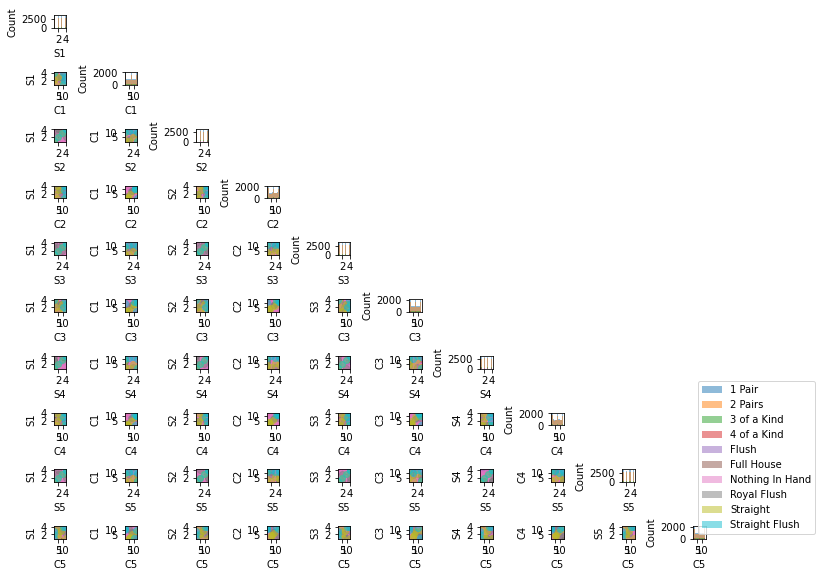

In [18]:
fig, axes = scatterplotmatrix(X[y==0], figsize=(10, 8), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==1], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==2], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==3], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==4], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==5], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==6], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==7], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==8], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==9], fig_axes=(fig, axes), alpha=0.5,names=names)

hand_classifications = np.unique(train_data_namedHands['Poker_Hand'])
hand_classifications
#print(hand_classifications)

plt.tight_layout()
plt.legend(labels=hand_classifications)
plt.savefig('poker_scatterplot')
plt.show()

**1.3: Splitting a Dataset into Train, Validation, and Test Subsets**

The following code cells in this section illustrate the process of splitting a dataset into several subsets.
One important step, prior to splitting a dataset, is shuffling it, otherwise we may end up with unrepresentative class distributions if the dataset was sorted prior to splitting.

In [19]:
import numpy as np
indices = np.arange(X.shape[0])
rng = np.random.RandomState(123)
permuted_indices = rng.permutation(indices)
permuted_indices

array([ 5644, 21109,  6885, ..., 17730, 15725, 19966])

In [20]:
train_size, valid_size = int(0.65*X.shape[0]), int(0.15*X.shape[0])
test_size = X.shape[0] - (train_size + valid_size)
print(train_size, valid_size, test_size)

16256 3751 5003


In [21]:
train_ind = permuted_indices[:train_size]
valid_ind = permuted_indices[train_size:(train_size + valid_size)]
test_ind = permuted_indices[(train_size + valid_size):]

In [22]:
X_train, y_train = X[train_ind], y[train_ind]
X_valid, y_valid = X[valid_ind], y[valid_ind]
X_test, y_test = X[test_ind], y[test_ind]
X_train.shape

(16256, 10)

**1.4: Python Classes**

• This section illustrates the concept of “classes” in Python, which is relevant for understanding how the scikit-learn API works on a fundamental level later in this lecture.

• Note that Python is an object oriented language, and everything in Python is an object.

• Classes are “templates” for creating objects (this is called “instantiating” objects).

• An object is a collection of special “functions” (a “function” of an object or class is called
“method”) and attributes.

• Note that the self attribute is a special keyword for referring to a class or an instantiated
object of a class, “itself.”

In [23]:
class VehicleClass():
    def __init__(self, horsepower): 
        "This is the 'init' method" 
        # this is a class attribute: 
        self.horsepower = horsepower
        
    def horsepower_to_torque(self, rpm): 
        "This is a regular method" 
        numerator = self.horsepower * 33000 
        denominator = 2* np.pi * 5000 
        return numerator/denominator
    
    def tune_motor(self): 
        self.horsepower *= 2
        
    def _private_method(self): 
        print('this is private')
        
    def __very_private_method(self): print('this is very private')

In [24]:
 # instantiate an object:
car1 = VehicleClass(horsepower=123)
print(car1.horsepower)

123


In [25]:
car1.horsepower_to_torque(rpm=5000)

129.20198280200063

In [26]:
car1.tune_motor()
car1.horsepower_to_torque(rpm=5000)

258.40396560400126

In [27]:
car1._private_method()

this is private


In [28]:
car1._VehicleClass__very_private_method()

this is very private


In [29]:
class CarClass(VehicleClass):
    
    def __init__(self, horsepower):
        super(CarClass, self).__init__(horsepower)
        self.num_wheels = 4
    
new_car = CarClass(horsepower=123)
print('Number of wheels:', new_car.num_wheels)
print('Horsepower:', new_car.horsepower)
new_car.tune_motor()
print('Horsepower:', new_car.horsepower)

Number of wheels: 4
Horsepower: 123
Horsepower: 246


**1.5: K-Nearest Neighbors Implementation**

• Below is a very simple implementation of a K-nearest Neighbor classifier.

• This is a very slow and ineﬀicient implementation, and in real-world problems, it is always recommended to use established libraries (like scikit-learn) instead of implementing algorithms
from scratch.

• The scikit-learn library, for example, implements kNN much more eﬀiciently and robustly –
using advanced data structures (KD-Tree and Ball-Tree, which we briefly discussed in Lecture
02).

• A scenario where it is useful to implement algorithms from scratch is for learning and teaching
purposes, or if we want to try out new algorithms, hence, the implementation below, which gently introduces how things are implemented in scikit-learn.

In [30]:
class KNNClassifier(object):
    
    def __init__(self, k, dist_fn=None):
        self.k = k
        if dist_fn is None:
            self.dist_fn = self._euclidean_dist
            
    def _euclidean_dist(self, a, b):
        dist = 0.
        for ele_i, ele_j in zip(a, b):
            dist += ((ele_i - ele_j)**2)
        dist = dist**0.5
        return dist
    
    def _find_nearest(self, x):
        dist_idx_pairs = []
        for j in range(self.dataset_.shape[0]):
            d = self.dist_fn(x, self.dataset_[j])
            dist_idx_pairs.append((d, j))
            
        sorted_dist_idx_pairs = sorted(dist_idx_pairs)
        return sorted_dist_idx_pairs
    
    def fit(self, X, y):
        self.dataset_ = X.copy()
        self.labels_ = y.copy()
        self.possible_labels_ = np.unique(y)
        
    def predict(self, X):
        predictions = np.zeros(X.shape[0], dtype=int) 
        for i in range(X.shape[0]):
            k_nearest = self._find_nearest(X[i])[:self.k]
            indices = [entry[1] for entry in k_nearest]
            k_labels = self.labels_[indices]
            counts = np.bincount(k_labels,minlength=self.possible_labels_.shape[0])
            pred_label = np.argmax(counts)
            predictions[i] = pred_label
        return predictions

In [31]:
knn_model = KNNClassifier(k=3)
knn_model.fit(X_train, y_train)
print(knn_model.predict(X_valid))

KeyboardInterrupt: 

**1.6: Scikit-Learn Estimator API**

• Below is an overview of the scikit-learn estimator API, which is used for implementing clas- sification and regression models/algorithms.

• We have seen the methods in the context of the kNN implementation earlier; however, one interesting, additional method we have not covered yet is score.

• The score method simply runs predict on the features (X) internally and then computes the performance by comparing the predicted targets to the true targets y.

• In the case of classification models, the score method computes the classification accuracy (in the range [0, 1]) – i.e., the proportion of correctly predicted labels. In the case of regression models, the score method computes the coeﬀicient of determination (R2).

In [ ]:
class SupervisedEstimator(...):
    def__init__(self, hyperparam_1, ...):
        self.hyperparam_1
        ...
        
    def fit(self, X, y):
        ...
        self.fit_attribute_
        return self
    
    def predict(self, X):
        ...
        return y_pred
    
    def score(self, X, y):
        ...
        return score
    
    def _private_method(self):
        ...

For 2D datasets (which we usually only have in teaching/learning contexts), we can plot the decision regions using a convenient wrapper function in mlxtend as shown below.

ValueError: Filler values must be provided when X has more than 2 training features.

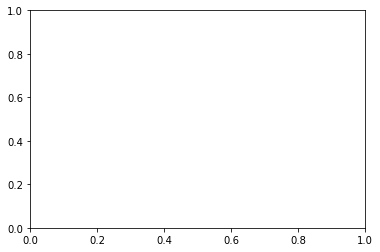

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, knn_model)
plt.xlabel('testing x')
plt.ylabel('testing y')
plt.savefig('decisionreg.pdf')
plt.show()

# 1.7: Stratification

• Previously, we wrote our own code to shuffle and split a dataset into training, validation, and test subsets, which had one considerable downside.

• If we are working with small datasets and split it randomly into subsets, it will affect the class distribution in the samples – this is problematic since machine learning algorithms/models as- sume that training, validation, and test samples have been drawn from the same distributions to produce reliable models and estimates of the generalization performance.

• The method of ensuring that the class label proportions are the same in each subset after splitting, we use an approach that is usually referred to as “stratification.”

• Stratification is supported in scikit-learn’s train_test_split method if we pass the class label array to the stratify parameter as shown below.

In [34]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X,y,test_size=0.2,shuffle=True, random_state=123, stratify=y)
np.bincount(y_temp)

array([9994, 8479,  965,  410,   75,   43,   29,    5,    4,    4])

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.2, shuffle=True, random_state=123, stratify=y_temp)
print('Train size', X_train.shape, 'class proportions', np.bincount(y_train))

Train size (16006, 10) class proportions [7995 6783  772  328   60   35   23    4    3    3]


# 1.8 Data Scaling

• In the case of the Iris dataset, all dimensions were measured in centimeters, hence “scaling” features would not be necessary in the context of kNN – unless we want to weight features differently.

• Whether or not to scale features depends on the problem at hand and requires your judgement.
• However, there are several algorithms (especially gradient-descent, etc., which we will cover later in this course), which work much better (are more robust, numerically stable, and converge faster) if the data is centered and has a smaller range.

• There are many different ways for scaling features; here, we only cover to of the most common
“normalization” schemes: min-max scaling and z-score standardization.

# 1.8.1 Normalization – Min-max scaling

• Min-max scaling squashes the features into a [0, 1] range, which can be achieved via the following equation for a single input i:

x^[i]_norm = (x^[i] - x_min)/(x_max - x_min)


Below is an example of how we can implement and apply min-max scaling on 6 data instances given a 1D input vector (1 feature) via NumPy.

In [36]:
x = np.arange(6).astype(float)
x

array([0., 1., 2., 3., 4., 5.])

In [37]:
x_norm = (x - x.min())/(x.max() - x.min())
x_norm

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

# 1.8: Standardization

• Z-score standardization is a useful standardization scheme if we are working with certain optimization methods (e.g., gradient descent, later in this course).

• After standardizing a feature, it will have the properties of a standard normal distribution, that is, unit variance and zero mean (N(μ = 0,σ2 = 1)); however, this does not transform a feature from not following a normal distribution to a normal distributed one.

• The formula for standardizing a feature is shown below, for a single data point x^[i].

x^[i]_std = (x^[i] - u_x)/o_x

In [39]:
x = np.arange(6).astype(float)
x

array([0., 1., 2., 3., 4., 5.])

In [41]:
x_std = (x - x.mean()) / x.std()
x_std

array([-1.46385011, -0.87831007, -0.29277002,  0.29277002,  0.87831007,
        1.46385011])

• Conveniently, NumPy and Pandas both implement a std method, which computes the stan- dard devation.

• Note the different results shown below.

In [42]:
df = pd.DataFrame([1,2,1,2,3,4])
df[0].std()

1.1690451944500122

In [43]:
df[0].values.std()

1.0671873729054748

• The results differ because Pandas computes the “sample” standard deviation (s_x), whereas
NumPy computes the “population” standard deviation (σx).

s_x = sqrt(1/(n-1) * sum(x^[i] - xbar)^2))

σ_x = sqrt(1/n * sum(x^[i] - u_x)^2))

• In the context of machine learning, since we are typically working with large datasets, we typically don’t care about Bessel’s correction (subtracting one degree of freedom in the de- nominator).

• Further, the goal here is not to model a particular distribution or estimate distribution pa- rameters accurately; however, if you like, you can remove the extra degree of freedom via NumPy’s ddof parameters – it’s not necessary in practice though.

In [44]:
df[0].values.std(ddof=1)

1.1690451944500122

• A concept that is very important though is how we use the estimated normalization param- eters (e.g., mean and standard deviation in z-score standardization).

• In particular, it is important that we re-use the parameters estimated from the training set to transfrom validation and test sets – re-estimating the parameters is a common “beginner- mistake” which is why we discuss it in more detail.

In [47]:
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)

X_train_std = (X_train - mu)/sigma
X_valid_std = (X_valid-mu)/sigma
X_test_std = (X_test - mu)/sigma

• Again, if we standardize the training dataset, we need to keep the parameters (mean and standard deviation for each feature). Then, we’d use these parameters to transform our test data and any future data later on

• Let’s assume we have a simple training set consisting of 3 samples with 1 feature column (let’s call the feature column “length in cm”):

    • example1: 10 cm -> class 2
    • example2: 20 cm -> class 2
    • example3: 30 cm -> class 1
    
Given the data above, we estimate the following parameters from this training set:

    • mean: 20
    • standard deviation: 8.2
    
If we use these parameters to standardize the same dataset, we get the following z-score values:

    • example1: -1.21 -> class 2 • example2: 0 -> class 2
    • example3: 1.21 -> class 1
    
Now, let’s say our model has learned the following hypotheses: It classifies samples with a stan- dardized length value < 0.6 as class 2 (and class 1 otherwise). So far so good. Now, let’s imagine we have 3 new unlabeled data points that you want to classify.

    • example4: 5 cm -> class ? 
    • example5: 6 cm -> class ? 
    • example6: 7 cm -> class ?
    
If we look at the non-standardized “length in cm” values in the training datast, it is intuitive to say that all of these examples (5, 6, and 7) are likely belonging to class 2 because they are smaller than anything in the training set. However, if we standardize these by re-computing the standard deviation and and mean from the new data, we will get similar values as before (i.e., properties of a standard normal distribtion) in the training set and our classifier would (probably incorrectly) assign the “class 2” label to the samples 4 and 5.

    • example5: -1.21 -> class 2 
    • example6: 0 -> class 2
    • example7: 1.21 -> class 1
    
However, if we use the parameters from the “training set standardization,” we will get the following standardized values

    • example5: -18.37 
    • example6: -17.15 
    • example7: -15.92
    
Note that these values are more negative than the value of example1 in the original training set, which makes much more sense now!


# 1.8.3: Scikit-Learn Transformer API

• The transformer API in scikit-learn is very similar to the estimator API; the main difference is that transformers are typically “unsupervised,” meaning, they don’t make use of class labels or target values.

• Typical examples of transformers in scikit-learn are the MinMaxScaler and the StandardScaler, which can be used to perform min-max scaling and z-score stan- dardization as discussed earlier.

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)
X_test_std = scaler.transform(X_test)

#Printing these just to show their values
X_train_std

array([[-0.45480644, -1.33309568, -1.33271483, ..., -1.58226164,
        -0.45066803,  1.07658393],
       [ 1.33776482, -0.53277826,  1.33593825, ..., -0.24727947,
        -1.34452089,  1.07658393],
       [ 1.33776482, -0.26600579,  1.33593825, ...,  1.62169558,
        -0.45066803, -1.32520977],
       ...,
       [ 1.33776482, -1.0663232 , -1.33271483, ...,  0.55370984,
         0.44318482, -0.79147784],
       [ 0.44147919, -1.33309568,  0.44638722, ...,  0.82070627,
        -0.45066803, -0.25774591],
       [ 0.44147919, -0.26600579, -0.44316381, ..., -0.5142759 ,
        -1.34452089,  0.00912006]])

In [50]:
X_valid_std

array([[ 1.33776482e+00, -1.59986815e+00, -4.43163807e-01, ...,
        -5.14275903e-01,  1.33703767e+00, -7.91477841e-01],
       [ 4.41479190e-01,  2.67539155e-01, -4.43163807e-01, ...,
         1.97169678e-02,  1.33703767e+00,  5.42851994e-01],
       [ 1.33776482e+00,  2.67539155e-01,  1.33593825e+00, ...,
         1.97169678e-02, -4.50668033e-01,  9.12006022e-03],
       ...,
       [-4.54806441e-01,  7.66683351e-04, -4.43163807e-01, ...,
         5.53709839e-01,  1.33703767e+00,  1.07658393e+00],
       [-4.54806441e-01, -1.33309568e+00,  4.46387220e-01, ...,
         1.08770271e+00, -1.34452089e+00,  5.42851994e-01],
       [-4.54806441e-01,  1.06785657e+00,  1.33593825e+00, ...,
         1.97169678e-02, -1.34452089e+00,  5.42851994e-01]])

In [51]:
X_test_std

array([[-4.54806441e-01,  2.67539155e-01, -1.33271483e+00, ...,
         1.97169678e-02,  4.43184821e-01,  9.12006022e-03],
       [ 4.41479190e-01,  7.66683351e-04, -1.33271483e+00, ...,
         2.86713403e-01, -4.50668033e-01, -1.59207574e+00],
       [-4.54806441e-01,  1.60140152e+00, -1.33271483e+00, ...,
        -2.47279468e-01, -1.34452089e+00,  8.09717961e-01],
       ...,
       [-4.54806441e-01,  5.34311627e-01,  4.46387220e-01, ...,
         1.35469914e+00, -1.34452089e+00, -2.57745907e-01],
       [-4.54806441e-01, -7.99550733e-01,  4.46387220e-01, ...,
        -5.14275903e-01,  4.43184821e-01, -7.91477841e-01],
       [ 4.41479190e-01,  1.06785657e+00, -1.33271483e+00, ...,
         1.97169678e-02, -1.34452089e+00,  5.42851994e-01]])

# 1.9 Categorical Data

• When we preprocess a dataset as input to a machine learning algorithm, we have to be careful how we treat categorical variables.

• There are two broad categories of categorical variables: nominal (no order implied) and ordinal (order implied).

In [53]:
#For this part of the project, I will use the version of the poker hands data in which the 
#poker_hands column has its data named (making it easier to understand at a glance). A certain hand in poker is better
#than another, which means this is an ordinal variable. An order/ranking is implied.

train_data_namedHands

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker_Hand
0,1,10,1,11,1,13,1,12,1,1,Royal Flush
1,2,11,2,13,2,10,2,12,2,1,Royal Flush
2,3,12,3,11,3,13,3,10,3,1,Royal Flush
3,4,10,4,11,4,1,4,13,4,12,Royal Flush
4,4,1,4,13,4,12,4,11,4,10,Royal Flush
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,Nothing In Hand
25006,4,1,4,10,3,13,3,4,1,10,1 Pair
25007,2,1,2,10,4,4,4,1,4,13,1 Pair
25008,2,12,4,3,1,10,1,12,4,9,1 Pair


• To convert ordinal variables into a proper representation for numerical computations via machine learning algorithms, we can use the now familiar map method in Pandas, as shown below.

In [64]:
poker_dict = {
     'Nothing In Hand':0,
     '1 Pair': 1,
     '2 Pairs': 2,
     '3 of a Kind': 3,
     'Straight': 4,
     'Flush': 5,
     'Full House': 6,
     '4 of a Kind': 7,
     'Straight Flush': 8,
     'Royal Flush': 9
}

In [65]:
copy_for_mapping_exercise = train_data.copy()
copy_for_mapping_exercise['Poker_Hand'] = copy_for_mapping_exercise['Poker_Hand'].apply(lambda x: 0 if x=='Nothing In Hand' else x)

copy_for_mapping_exercise

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker_Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


In [75]:
poker_dict = {'Nothing In Hand':0,
     '1 Pair':1,
     '2 Pairs':2,
     '3 of a Kind':3,
     'Straight':4,
     'Flush':5,
     'Full House':6,
     '4 of a Kind':7,
     'Straight Flush':8,
     'Royal Flush':9}

df = train_data_namedHands.copy()
df['Poker_Hand'] = df['Poker_Hand'].map(poker_dict)

df

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker_Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


• Machine learning algorithms do not assume an ordering in the case of class labels.

• Here, we can use the LabelEncoder from scikit-learn to convert class labels to integers as an
alternative to using the map method

In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoder_example = train_data_namedHands.copy()
encoder_example

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker_Hand
0,1,10,1,11,1,13,1,12,1,1,Royal Flush
1,2,11,2,13,2,10,2,12,2,1,Royal Flush
2,3,12,3,11,3,13,3,10,3,1,Royal Flush
3,4,10,4,11,4,1,4,13,4,12,Royal Flush
4,4,1,4,13,4,12,4,11,4,10,Royal Flush
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,Nothing In Hand
25006,4,1,4,10,3,13,3,4,1,10,1 Pair
25007,2,1,2,10,4,4,4,1,4,13,1 Pair
25008,2,12,4,3,1,10,1,12,4,9,1 Pair


In [73]:
encoder_example['Poker_Hand'] = le.fit_transform(encoder_example['Poker_Hand'])
encoder_example

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker_Hand
0,1,10,1,11,1,13,1,12,1,1,7
1,2,11,2,13,2,10,2,12,2,1,7
2,3,12,3,11,3,13,3,10,3,1,7
3,4,10,4,11,4,1,4,13,4,12,7
4,4,1,4,13,4,12,4,11,4,10,7
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,6
25006,4,1,4,10,3,13,3,4,1,10,0
25007,2,1,2,10,4,4,4,1,4,13,0
25008,2,12,4,3,1,10,1,12,4,9,0


• Representing nominal variables properly is a bit more tricky.

• Sincemachinelearningalgorithmsusuallyassumeanorderifavariabletakesonintegervalues,
we need to apply a “trick” here such that the algorithm would not make this assumption.

• this “trick” is also called “one-hot” encoding – we binarize a nominal variable, as shown below for the color variable (again, we do this because some ordering like orange < red < blue would
not make sense in many applications).

In [78]:
dummy_copy = train_data_namedHands.copy()
pd.get_dummies(dummy_copy)
#Here it appears that for each type of hand we could get, get_dummies created a new column in which you can have a binary value
#Either we got this type of hand (1), or we didn't (0)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker_Hand_1 Pair,Poker_Hand_2 Pairs,Poker_Hand_3 of a Kind,Poker_Hand_4 of a Kind,Poker_Hand_Flush,Poker_Hand_Full House,Poker_Hand_Nothing In Hand,Poker_Hand_Royal Flush,Poker_Hand_Straight,Poker_Hand_Straight Flush
0,1,10,1,11,1,13,1,12,1,1,0,0,0,0,0,0,0,1,0,0
1,2,11,2,13,2,10,2,12,2,1,0,0,0,0,0,0,0,1,0,0
2,3,12,3,11,3,13,3,10,3,1,0,0,0,0,0,0,0,1,0,0
3,4,10,4,11,4,1,4,13,4,12,0,0,0,0,0,0,0,1,0,0
4,4,1,4,13,4,12,4,11,4,10,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0,0,0,0,0,0,1,0,0,0
25006,4,1,4,10,3,13,3,4,1,10,1,0,0,0,0,0,0,0,0,0
25007,2,1,2,10,4,4,4,1,4,13,1,0,0,0,0,0,0,0,0,0
25008,2,12,4,3,1,10,1,12,4,9,1,0,0,0,0,0,0,0,0,0


• Note that executing the code above produced 3 new variables for “color,” each of which takes on binary values.

• However, there is some redundancy now (e.g., if we know the values for color_green and color_red, we automatically know the value for color_blue).

• While collinearity may cause problems (i.e., the matrix inverse doesn’t exist in e.g., the context of the closed-form of linear regression), again, in machine learning we typically would not care about it too much, because most algorithms can deal with collinearity (e.g., adding constraints like regularization penalties to regression models, which we learn via gradient- based optimization).

• However, removing collinearity if possible is never a bad idea, and we can do this conveniently by dropping e.g., one of the columns of the one-hot encoded variable.

In [79]:
pd.get_dummies(dummy_copy, drop_first=True)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker_Hand_2 Pairs,Poker_Hand_3 of a Kind,Poker_Hand_4 of a Kind,Poker_Hand_Flush,Poker_Hand_Full House,Poker_Hand_Nothing In Hand,Poker_Hand_Royal Flush,Poker_Hand_Straight,Poker_Hand_Straight Flush
0,1,10,1,11,1,13,1,12,1,1,0,0,0,0,0,0,1,0,0
1,2,11,2,13,2,10,2,12,2,1,0,0,0,0,0,0,1,0,0
2,3,12,3,11,3,13,3,10,3,1,0,0,0,0,0,0,1,0,0
3,4,10,4,11,4,1,4,13,4,12,0,0,0,0,0,0,1,0,0
4,4,1,4,13,4,12,4,11,4,10,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0,0,0,0,0,1,0,0,0
25006,4,1,4,10,3,13,3,4,1,10,0,0,0,0,0,0,0,0,0
25007,2,1,2,10,4,4,4,1,4,13,0,0,0,0,0,0,0,0,0
25008,2,12,4,3,1,10,1,12,4,9,0,0,0,0,0,0,0,0,0


# 1.10: Missing Data


• There are many different ways for dealing with missing data.

• The simplest approaches are removing entire columns or rows.

• Another simple approach is to impute missing values via the feature means, medians, mode, etc.

• There is no rule or best practice, and the choice of the approprite missing data imputation method depends on your judgement and domain knowledge.

• Below are some examples for dealing with missing data.

In [96]:
#We learned from part 1 of our project that our data does not have any data missing, but we will proceed with this 
#part of the exercise regardless.

missing_data = train_data.copy()
missing_data

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker_Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


In [97]:
#missing values per column
missing_data.isnull().sum()

S1            0
C1            0
S2            0
C2            0
S3            0
C3            0
S4            0
C4            0
S5            0
C5            0
Poker_Hand    0
dtype: int64

In [98]:
#drop rows with missing values
missing_data.dropna(axis=0)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker_Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


In [99]:
#drop columns with missing values
missing_data.dropna(axis=1)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker_Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


In [100]:
from sklearn.impute import SimpleImputer #Imputer has been deprecated. Had to use SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = missing_data.values
X = imputer.fit_transform(missing_data.values)
X

array([[ 1., 10.,  1., ...,  1.,  1.,  9.],
       [ 2., 11.,  2., ...,  2.,  1.,  9.],
       [ 3., 12.,  3., ...,  3.,  1.,  9.],
       ...,
       [ 2.,  1.,  2., ...,  4., 13.,  1.],
       [ 2., 12.,  4., ...,  4.,  9.,  1.],
       [ 1.,  7.,  3., ...,  3.,  7.,  1.]])

# 1.11: Feature Transformation, Extraction, and Selection

We have already covered very simple cases of feature transformation, i.e., normalization, that is, min-max scaling and standardization. There are many other cases, but an extensive coverage of feature preprocessing is beyond the scope of a machine learning class. However, we will will look at some popular feature selection (sequential feature selection) and feature extraction (e.g., principal component analysis) techniques later in this course.

# 1.12: Scikit-Learn Pipelines

• Scikit-learn pipelines are an extremely convenient and powerful concept – one of the things that sets scikit-learn apart from other machine learning libraries.

• Pipelines basically let us define a series of perprocessing steps together with fitting an esti- mator.

• Pipelines will automatically take care of pitfalls like estimating feature scaling parameters from the training set and applying those to scale new data (which we discussed earlier in the context of z-score standardization).

• Below is an example pipeline that combines the feature scaling step with the kNN classifier.

In [102]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))

In [103]:
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [105]:
pipe.fit(X_train, y_train)
pipe.predict(X_test)

array([1, 1, 0, ..., 1, 0, 1])

# 1.13 Intro Model Selection – Pipelines and Grid Search

• In machine learning practice, we often need to experiment with an machine learning algo- rithm’s hyperparameters to find a good setting.

• The process of tuning hyperparameters and comparing and selecting the resulting models is also called “model selection” (in contrast to “algorithm selection”).

• We will cover topics such as “model selection” and “algorithm selection” in more detail later in this course.

• For now, we are introducing the simplest way of performing model selection: using the “hold- out method.”

• In the holdout method, we split a dataset into 3 subsets: a training, a validation, and a test datatset.

• To avoid biasing the estimate of the generalization performance, we only want to use the test dataset once, which is why we use the validation dataset for hyperparameter tuning (model selection).

• Here, the validation dataset serves as an estimate of the generalization performance, too, but it becomes more biased than the final estimate on the test data because of its repeated re-use during model selection (think of “multiple hypothesis testing”).

In [106]:
from sklearn.model_selection import GridSearchCV
from mlxtend.evaluate import PredefinedHoldoutSplit
from sklearn.pipeline import make_pipeline
#from sklearn.datasets import load_iris -->Will be using our own dataset

In [113]:
X,y = train_data.loc[:, 'S1':'C5'], train_data['Poker_Hand']

train_ind, valid_ind = train_test_split(np.arange(X.shape[0]), test_size=0.2, shuffle=True,
                                                   random_state=123, stratify=y)

pipe = make_pipeline(StandardScaler(),KNeighborsClassifier())

params = {'kneighborsclassifier__n_neighbors': [1, 3, 5],
          'kneighborsclassifier__p': [1, 2]}

split = PredefinedHoldoutSplit(valid_indices=valid_ind)

grid = GridSearchCV(pipe, param_grid=params, cv=split)
grid.fit(X, y)
grid.cv_results_ 
#Was receiving an error saying grid_scores_ was not an available attribute. Some research brought me to using
#cv_results_ instead. 

{'mean_fit_time': array([0.02436304, 0.024158  , 0.02353001, 0.02348685, 0.02296185,
        0.02331495]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0.]),
 'mean_score_time': array([0.65831804, 0.43453813, 0.9596138 , 0.57908416, 1.08024192,
        0.66693902]),
 'std_score_time': array([0., 0., 0., 0., 0., 0.]),
 'param_kneighborsclassifier__n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kneighborsclassifier__p': masked_array(data=[1, 2, 1, 2, 1, 2],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kneighborsclassifier__n_neighbors': 1,
   'kneighborsclassifier__p': 1},
  {'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__p': 2},
  {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 1},
  {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifie